Raiz do Projeto calculada: c:\Users\rafal\OneDrive\Desktop\Projeto_Previsao_Climatica_Inteligente
Buscando dados em: c:\Users\rafal\OneDrive\Desktop\Projeto_Previsao_Climatica_Inteligente\data\raw\temperature_dataset.csv
Arquivo encontrado! Carregando dataset...


,Formatted Date,Summary,Precip Type,Temp_Real,Temp_Aparente,Umidade,Velocidade_Vento,Wind Bearing (degrees),Visibility (km),Loud Cover,Pressao_Atmosferica,Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


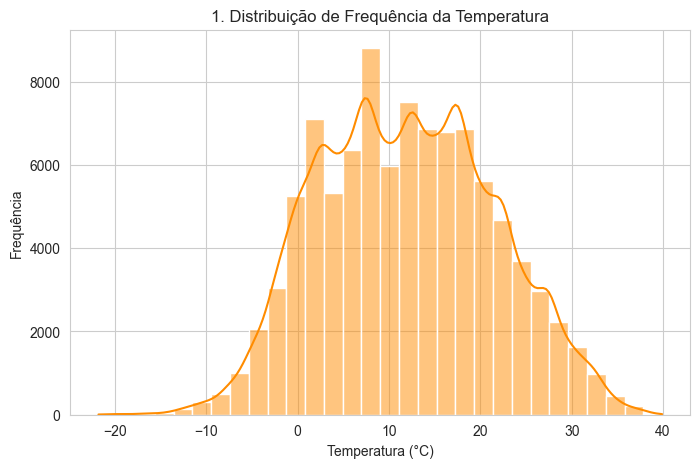

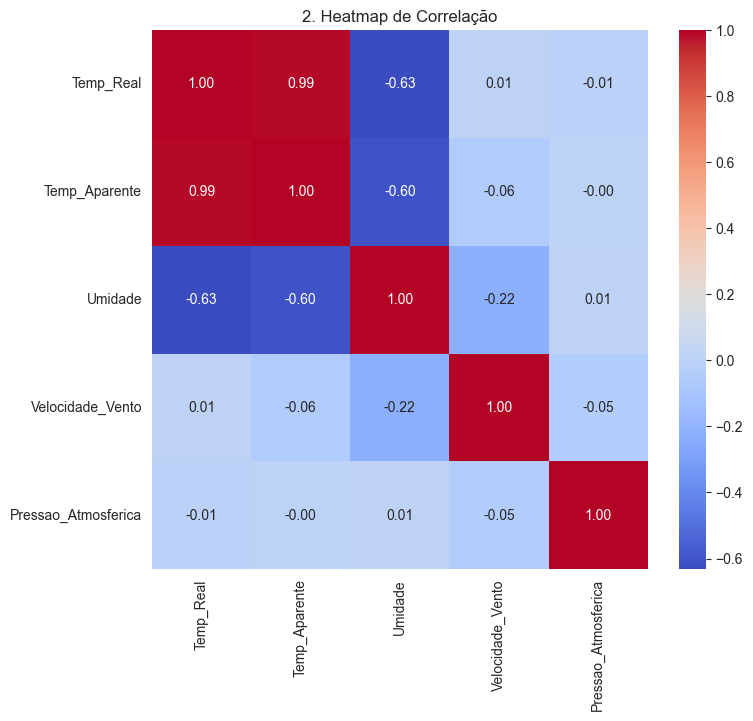

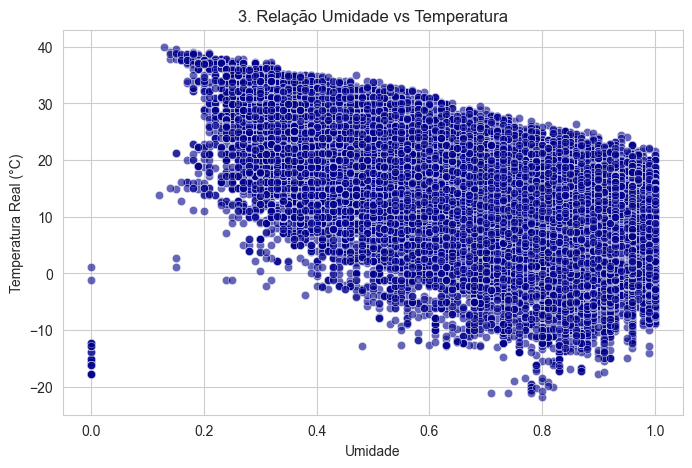

In [5]:
# Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configurações de visualização
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
pd.set_option('display.max_columns', None)

# Mapeamento de Nomes
colunas = {
    'Temperature (C)': 'Temp_Real', 
    'Apparent Temperature (C)': 'Temp_Aparente', 
    'Humidity': 'Umidade', 
    'Wind Speed (km/h)': 'Velocidade_Vento', 
    'Pressure (millibars)': 'Pressao_Atmosferica',
}



# 1. Pega onde o notebook está (pasta 'notebooks')
notebook_diretorio = os.getcwd()

# 2. Pega o diretório "pai" (Raiz do Projeto)
# Isso equivale a fazer "cd .."
project_root = os.path.dirname(notebook_diretorio)

if os.path.basename(notebook_diretorio) != "notebooks":
    project_root = notebook_diretorio

caminho_dados = os.path.join(project_root, 'data', 'raw', 'temperature_dataset.csv')
caminho_salvamento = os.path.join(project_root, 'reports', 'figures')



print(f"Raiz do Projeto calculada: {project_root}")
print(f"Buscando dados em: {caminho_dados}")
# =========================================

# Verifica e cria pasta de gráficos
os.makedirs(caminho_salvamento, exist_ok=True)

if not os.path.exists(caminho_dados):
    print(f"Caminho tentado: {caminho_dados}")
else:
    # 1. Carregamento
    print("Arquivo encontrado! Carregando dataset...")
    data = pd.read_csv(caminho_dados)
    data = data.rename(columns=colunas)
    
    # Mostra as primeiras linhas para confirmar
    display(data.head())

    # 2. Gera Gráficos (Visualização direta no Notebook)
    
    # Definir variável alvo
    coluna_alvo = 'Temp_Real'
    if coluna_alvo not in data.columns:
        coluna_alvo = 'Temperature (C)'

    # --- GRÁFICO 1 ---
    plt.figure(figsize=(8, 5))
    sns.histplot(data[coluna_alvo], kde=True, bins=30, color='darkorange')
    plt.title('1. Distribuição de Frequência da Temperatura')
    plt.xlabel('Temperatura (°C)')
    plt.ylabel('Frequência')
    plt.show() #show() para ver na hora
    
    # --- GRÁFICO 2 ---
    # Filtra colunas numéricas
    colunas_presentes = [col for col in colunas.values() if col in data.columns]
    if not colunas_presentes: 
        colunas_presentes = data.select_dtypes(include=np.number).columns.tolist()

    plt.figure(figsize=(8, 7))
    sns.heatmap(data[colunas_presentes].corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('2. Heatmap de Correlação')
    plt.show()

    # --- GRÁFICO 3 ---
    x_col = 'Umidade' if 'Umidade' in data.columns else 'Humidity'
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=x_col, y=coluna_alvo, data=data, alpha=0.6, color='darkblue')
    plt.title(f'3. Relação {x_col} vs Temperatura')
    plt.xlabel('Umidade')
    plt.ylabel('Temperatura Real (°C)')
    plt.show()